In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.ticker as ticker
# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [33]:
df=pd.read_csv("../artifacts/dataset/Cross Sell Insight dataset/data.csv")

In [34]:
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Data Wrangling

In [35]:
df.shape

(381109, 12)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [37]:
cat_features=["Gender","Driving_License","Previously_Insured","Vehicle_Age","Vehicle_Damage"]
num_features=list(set(df.columns).difference(cat_features))
num_features = [x for x in num_features if x != 'id']


In [38]:
print(f"Categorical Features: {cat_features}")
print(f"Continuous Features: {num_features}")

Categorical Features: ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
Continuous Features: ['Annual_Premium', 'Vintage', 'Policy_Sales_Channel', 'Region_Code', 'Age', 'Response']


In [39]:
def get_unique_values(cat_features):
    for col in cat_features:
        unq=set(df[col])
        print(f"Unique values of {col} are: {unq}")
        print("--------------------------------------------------")

get_unique_values(cat_features)

Unique values of Gender are: {'Female', 'Male'}
--------------------------------------------------
Unique values of Driving_License are: {0, 1}
--------------------------------------------------
Unique values of Previously_Insured are: {0, 1}
--------------------------------------------------
Unique values of Vehicle_Age are: {'< 1 Year', '1-2 Year', '> 2 Years'}
--------------------------------------------------
Unique values of Vehicle_Damage are: {'No', 'Yes'}
--------------------------------------------------


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [41]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
id,0,0.0
Gender,0,0.0
Age,0,0.0
Driving_License,0,0.0
Region_Code,0,0.0
Previously_Insured,0,0.0
Vehicle_Age,0,0.0
Vehicle_Damage,0,0.0
Annual_Premium,0,0.0
Policy_Sales_Channel,0,0.0


In [42]:
df.duplicated().sum()

0

### **EDA**

In [43]:
df=df.drop("id",axis=1)

In [44]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [45]:
def pie_bar_plot(df, col, hue="Response"):
    plt.figure(figsize=(14, 6))
    
    col_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = col_counts
    plt.title(f"{col} distribution", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('husl', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 1]
    value_1 = col_counts
    value_2 = new_df[col].value_counts().sort_index()
    ax2 = np.round((value_2 / value_1) * 100, 1).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='husl')
    plt.title(f"Customer opting for Insurance wrt {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(float(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()



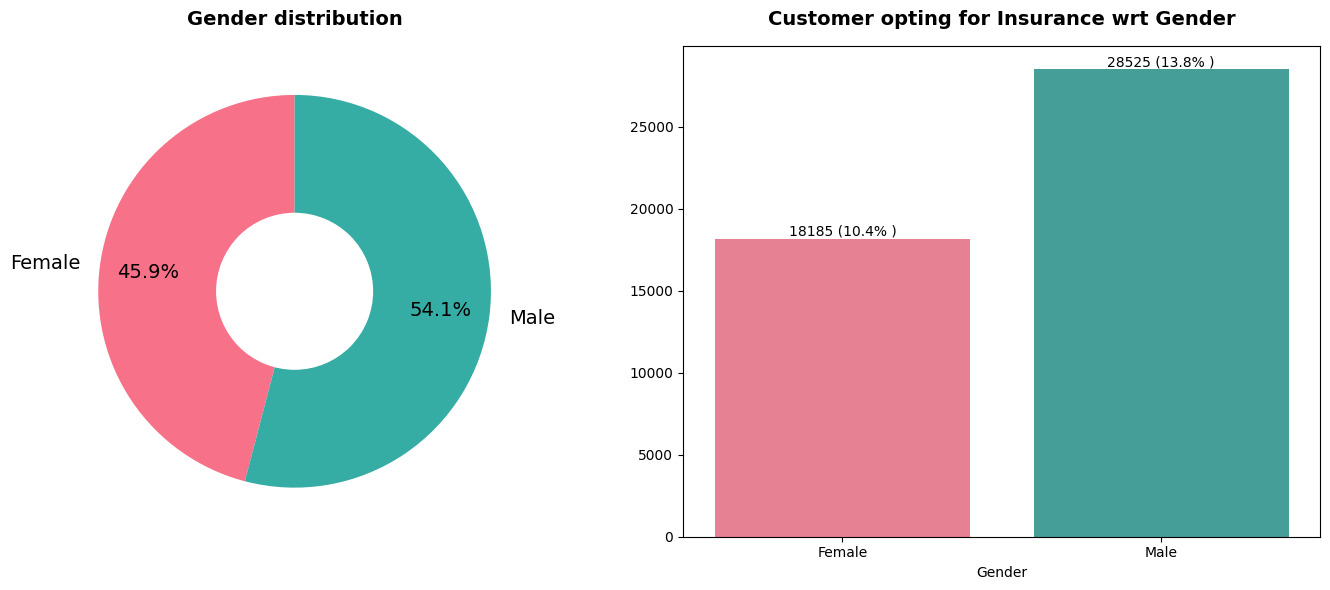

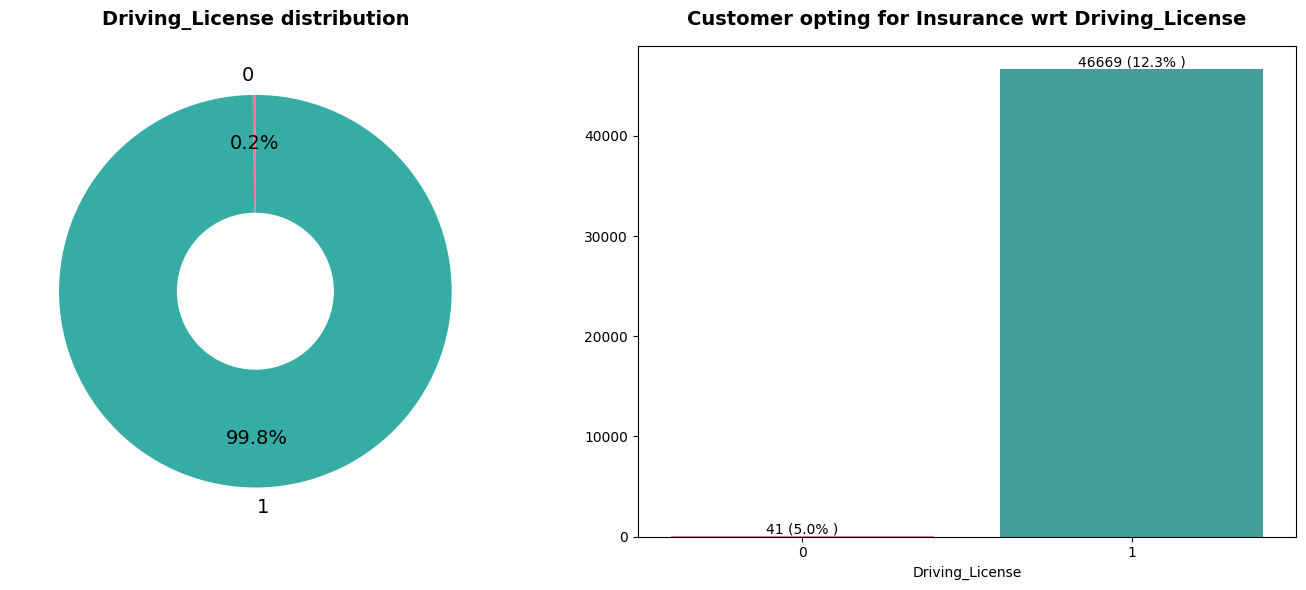

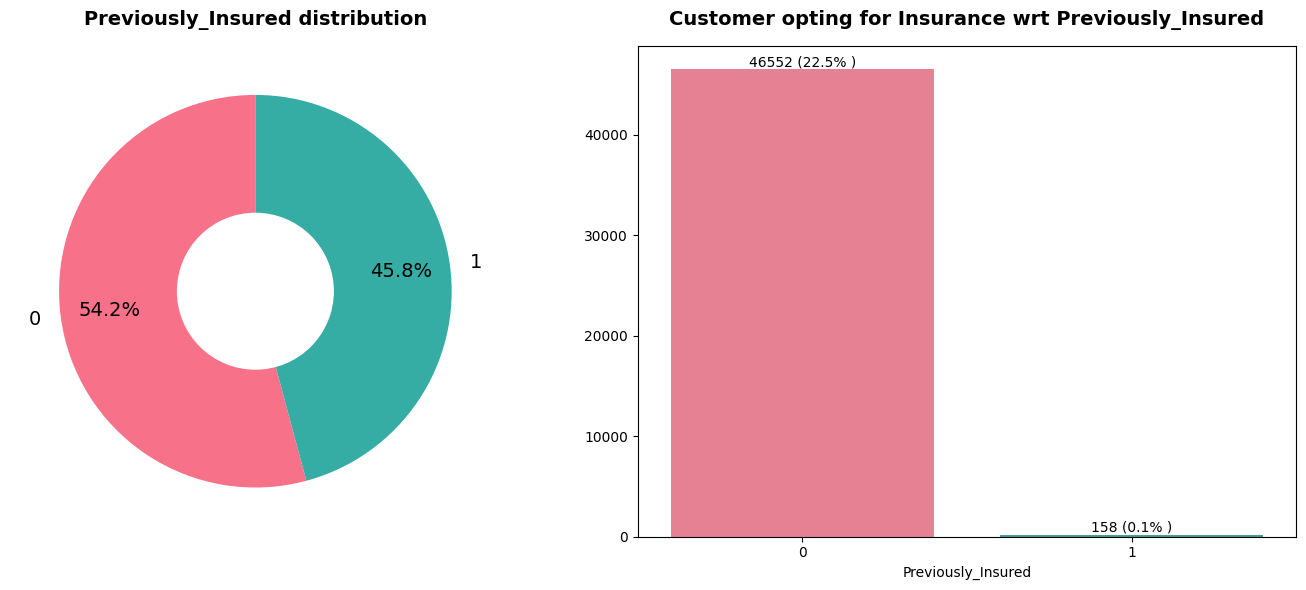

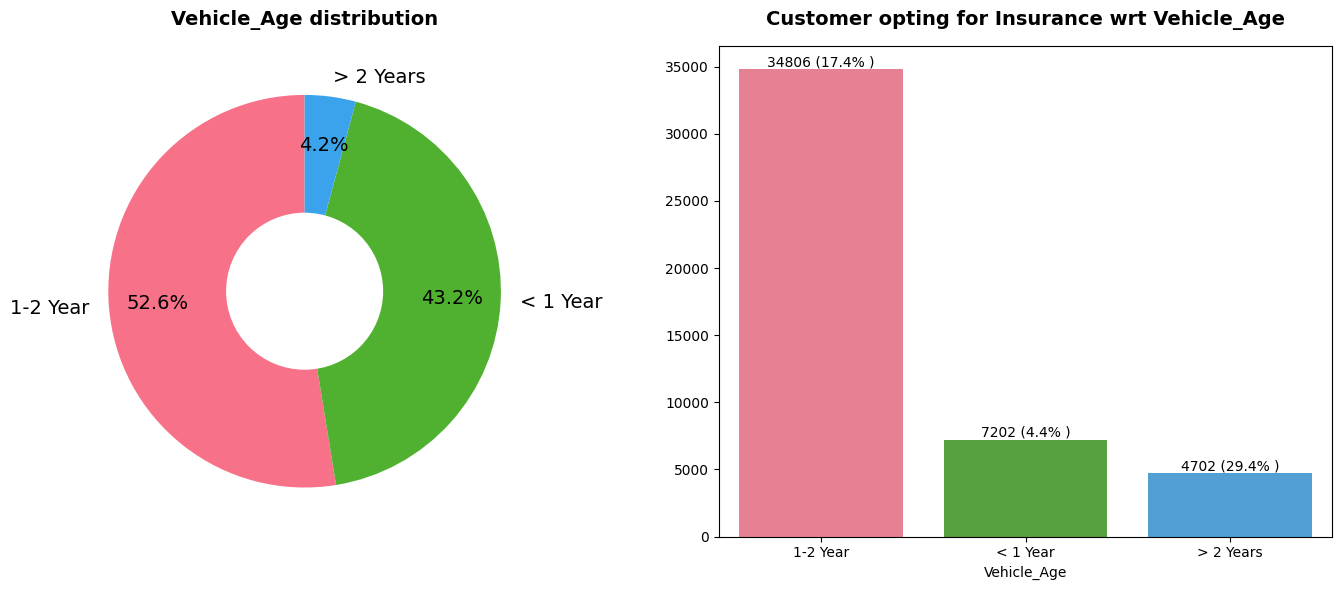

In [46]:
for col in cat_features[:-1]:
    pie_bar_plot(df,col)


**Key Insights:**
1. Male opting for vehicle insurance is slightly higher than female.
2. Majority of the customers with driving license have opted for Vehicle Insurance
3. Approx. 22% of Customers with out prior vehicle insurance have opted.
4. Among Customers having vehicle age between 1 - 2 years; around 17.4% are willing to purchase vehicle insurance.
5. Among customers who have their vehicle previously damages, around 23.8% are willing to opt for vehicles insurance.

In [47]:
def box_violin_plot(df, col):
    plt.figure(figsize=(13.5, 6))
    
    # Violin plot
    plt.subplot(1, 2, 1)
    sns.violinplot(x=df[col], palette='viridis', inner='quartile')  
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center') 
    
    plt.title(f"Distribution by {col} (Violin Plot)", fontweight="black", size=14, pad=10)

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=col, data=df, palette='husl')
    plt.title(f"Distribution by {col} (Box Plot)", fontweight="black", size=14, pad=10)
    
    plt.tight_layout()
    plt.show()


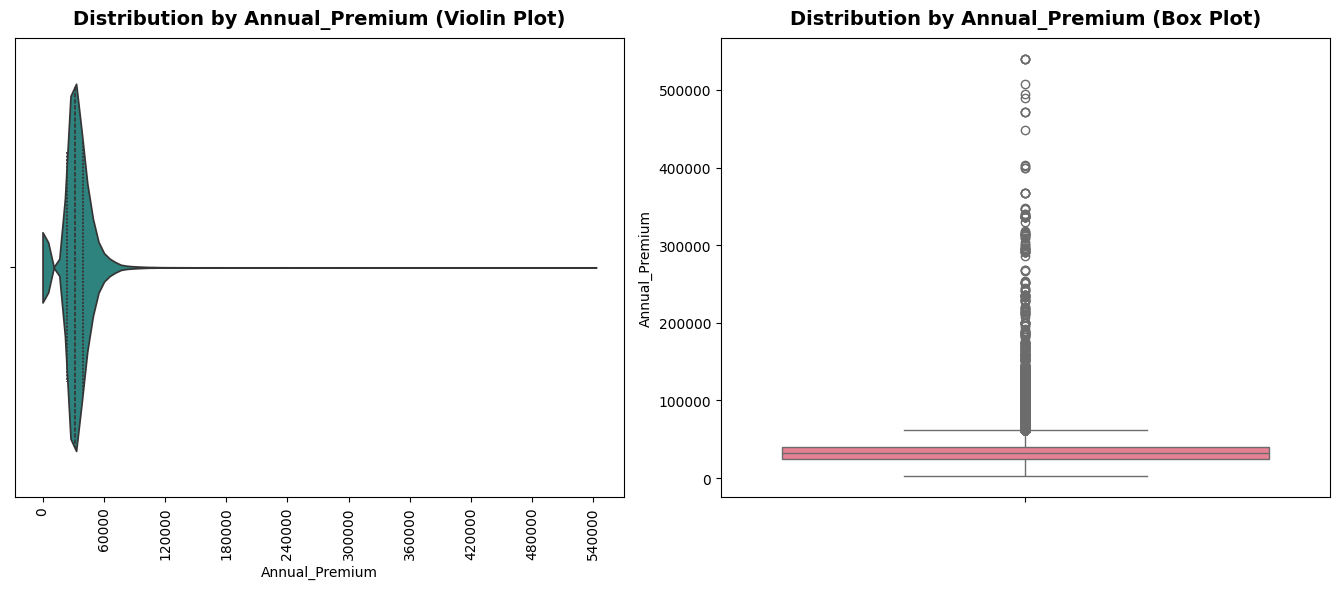

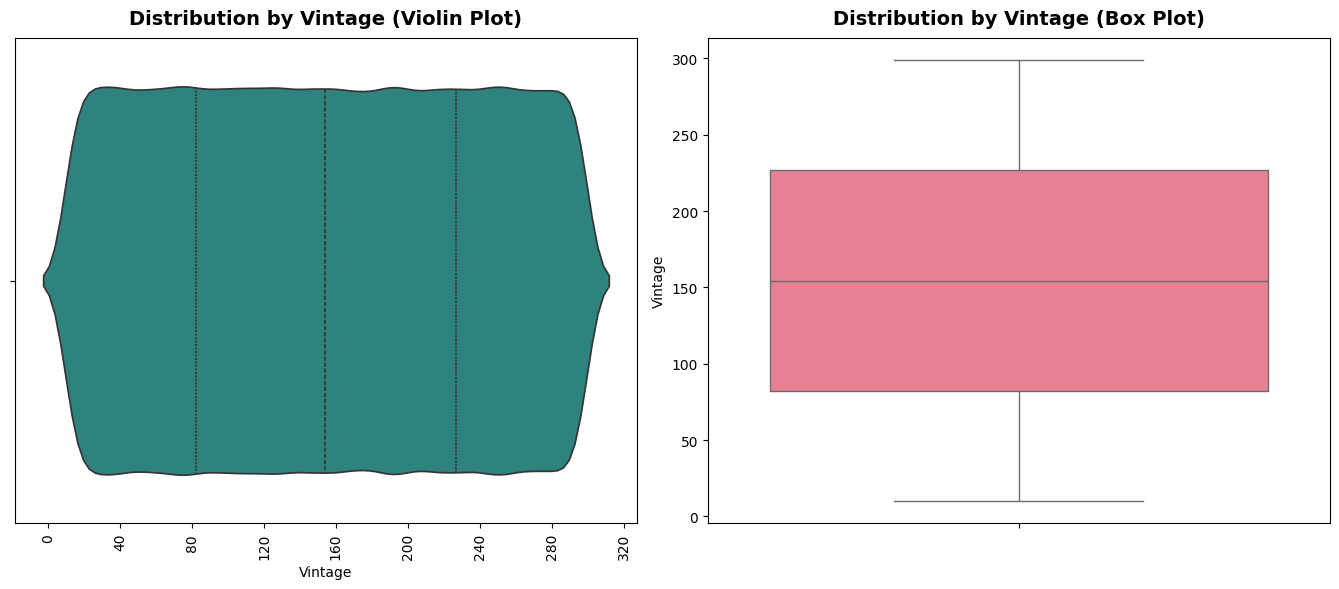

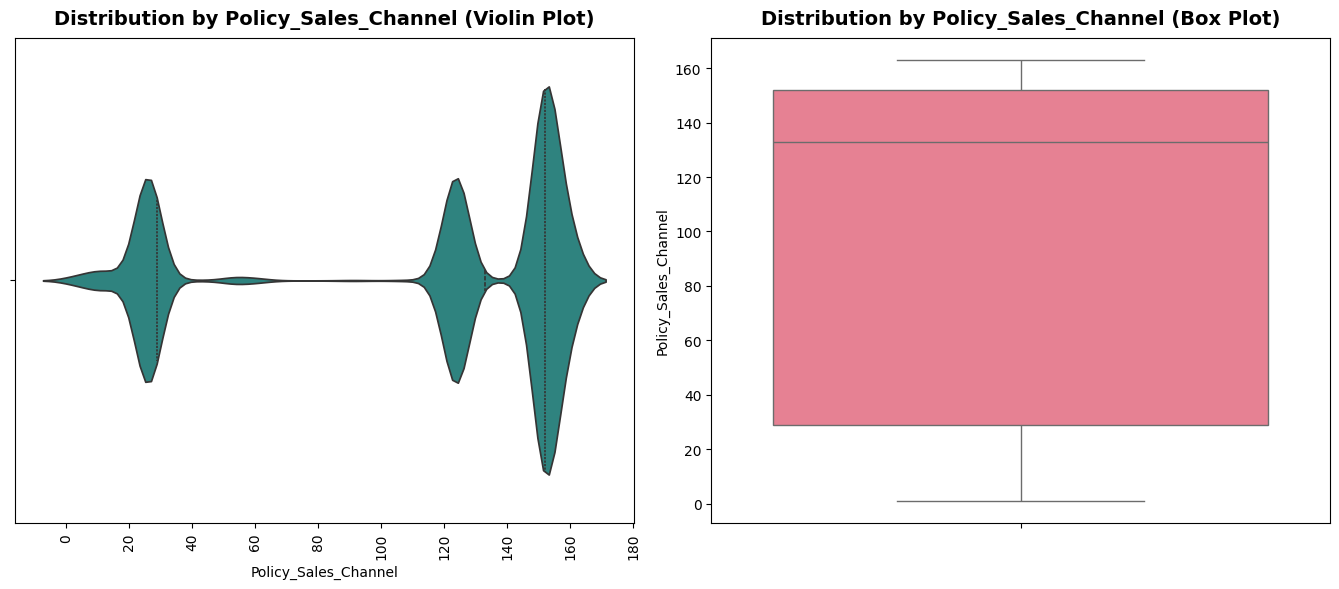

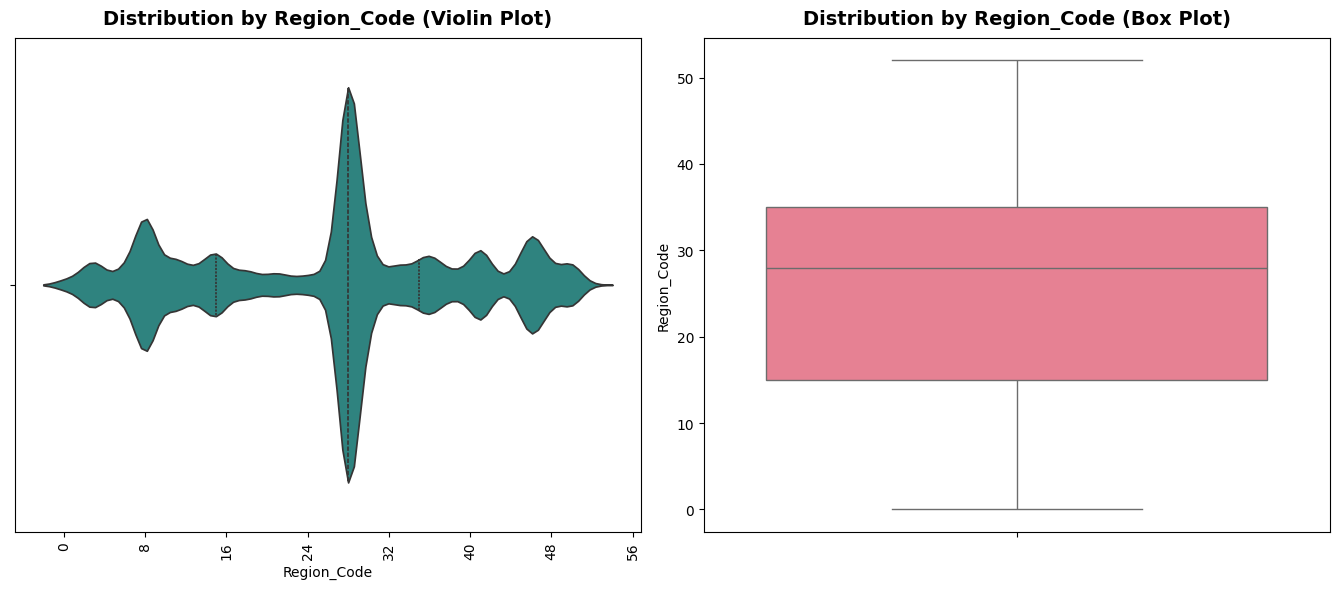

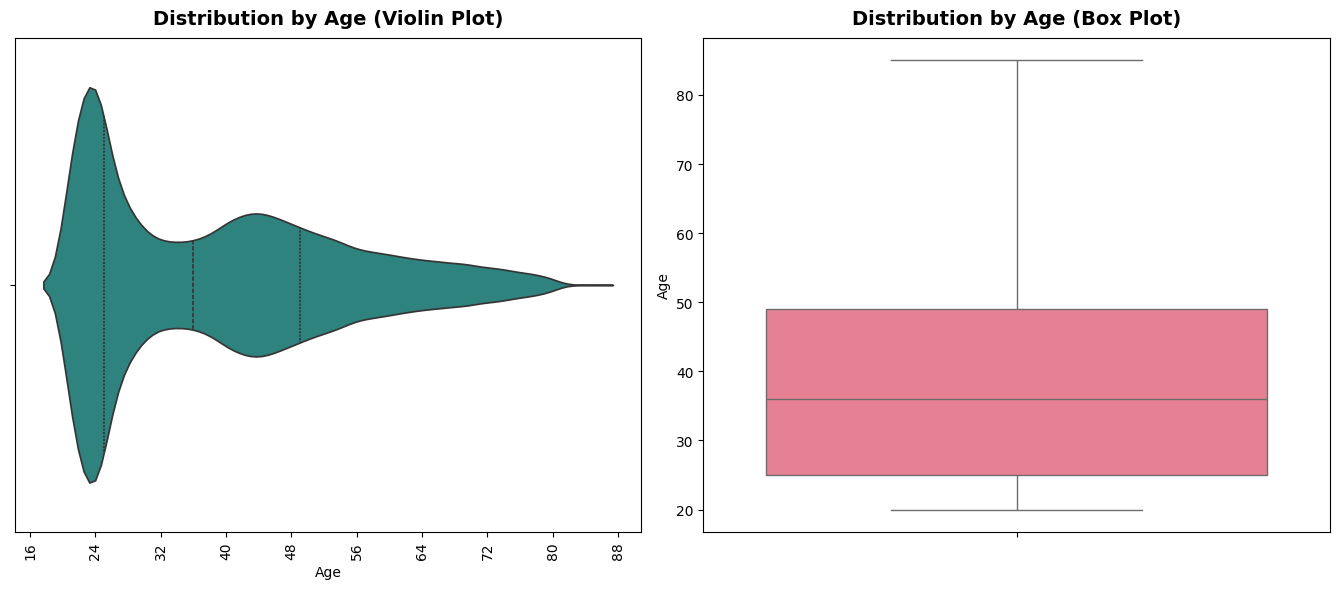

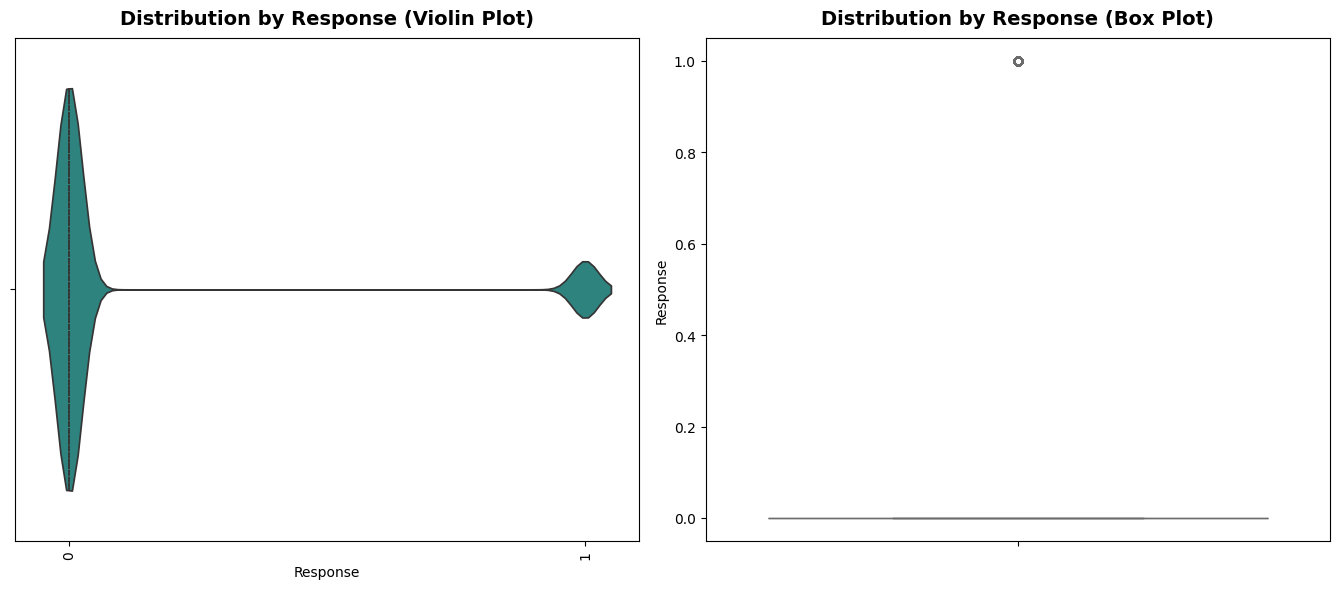

In [48]:
for col in num_features:
    box_violin_plot(df,col)

### Feature Importance

#### **1. Chi-Square Test**

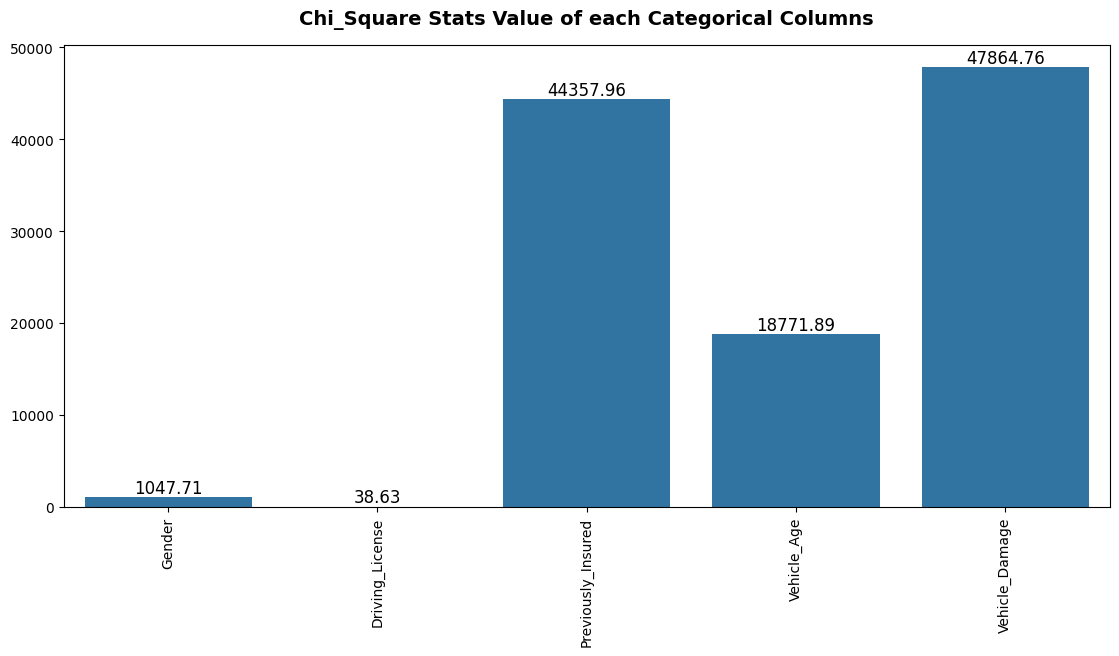

In [49]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_features:
    contingency_table = pd.crosstab(df[col], df['Response'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value
    
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(13.5,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi_Square Stats Value of each Categorical Columns",fontweight="black",size=14,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=12)

plt.show()

In [50]:
chi_data = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_data["p_value"] =  [format(p, '.20f') for p in list(p_values.values())]   # P square value upto 20 decimal
chi_data

,Features,Chi_2 Statistic,p_value
0,Gender,1047.707758,0.00000000000000000000
1,Driving_License,38.634117,0.00000000051117535040
2,Previously_Insured,44357.964722,0.00000000000000000000
3,Vehicle_Age,18771.889904,0.00000000000000000000
4,Vehicle_Damage,47864.761801,0.00000000000000000000


**Key Insights**
1. All the categorical features are having p value < 0.05.
2. This indicates a significant relationship between the categorical variables.

#### **2. Anova Test**

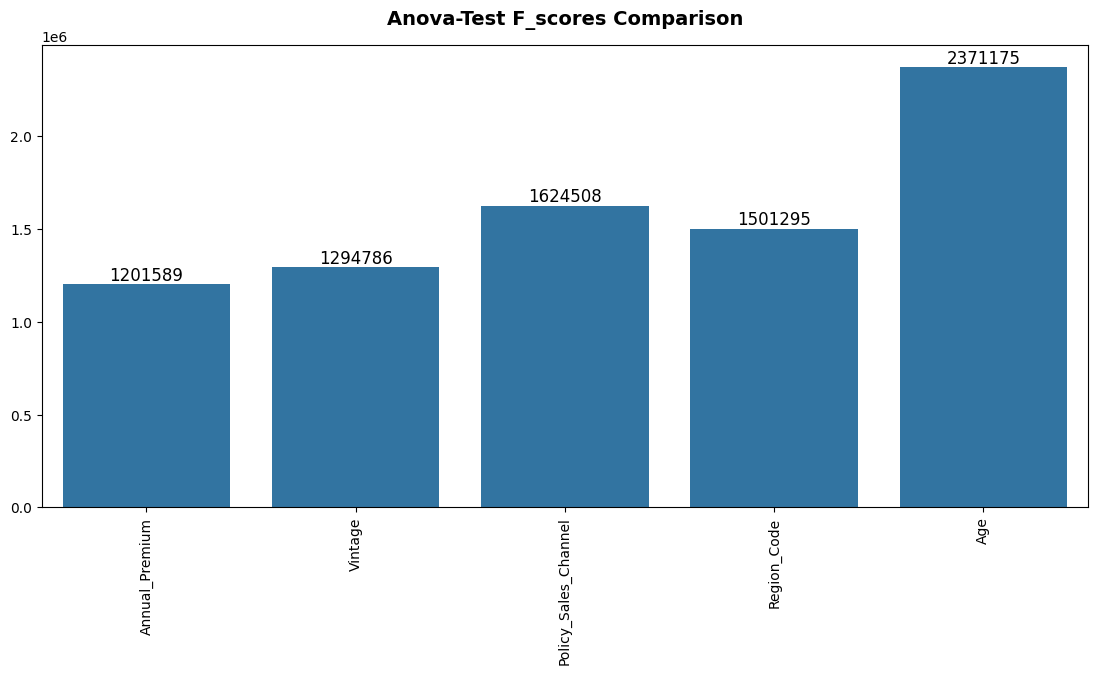

In [51]:
f_scores = {}
p_values = {}
num_features.remove("Response")
for column in num_features:
    f_score, p_value = stats.f_oneway(df[column],df["Response"])
    
    f_scores[column] = f_score
    p_values[column] = p_value
    

plt.figure(figsize=(13.5,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=14, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=12)
plt.show()

In [52]:
annova_data = pd.DataFrame({"Features":keys,"f_Score":values})
annova_data["p_value"] = [format(p, '.20f') for p in list(p_values.values())]
annova_data

,Features,f_Score,p_value
0,Annual_Premium,1.201590e+06,0.00000000000000000000
1,Vintage,1.294786e+06,0.00000000000000000000
2,Policy_Sales_Channel,1.624508e+06,0.00000000000000000000
3,Region_Code,1.501295e+06,0.00000000000000000000
4,Age,2.371176e+06,0.00000000000000000000


**Key Insights:**
1. All the numerical features are having p value < 0.05.
2. This shows that all the numerical features are important.

### **Data Preprocessing**

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [56]:
def feature_encoding(df):
    df['Gender']=le.fit_transform(df['Gender'])
    df['Vehicle_Damage']=le.fit_transform(df['Vehicle_Damage'])
    df["Vehicle_Age"] = df["Vehicle_Age"].replace({"< 1 Year":0,"1-2 Year":1, "> 2 Years":2})


In [57]:
feature_encoding(df)

In [61]:
x=df.drop(["Response"],axis=1)
y=df['Response']

In [62]:
#Balancing target variable distribution using over sampling technique(ADASYN)
from imblearn.over_sampling import ADASYN,SMOTE

In [63]:
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

In [64]:
y_smote.value_counts()

Response
1    334399
0    334399
Name: count, dtype: int64

### Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
x_scaled = scaler.fit_transform(x_smote)

### Variance Inflation Factor

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
variable = x_scaled
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]
vif['Features'] = x.columns
vif

,Variance Inflation Factor,Features
0,1.015720,Gender
1,2.307692,Age
2,1.005359,Driving_License
3,1.002707,Region_Code
4,3.355310,Previously_Insured
5,2.314147,Vehicle_Age
6,3.393711,Vehicle_Damage
7,1.032402,Annual_Premium
8,1.493677,Policy_Sales_Channel
9,1.000066,Vintage


Inference:
1. VIF value is below 5. Hence, there is no multi colinearity.


In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

In [70]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(468158, 10) (468158,) (200640, 10) (200640,)


Model Training

In [73]:
import time
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [79]:
models = {
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=False)

}

def print_model_metrics(model, X, y, model_name):
    print(f"{model_name}")
    start_time = time.time() 
    cv_results_accuracy = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
    cv_results_roc = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')
    
    mean_accuracy = cv_results_accuracy.mean()
    mean_roc_score = cv_results_roc.mean()
    
    end_time = time.time()
    training_time = end_time - start_time
    print(f" Mean Training Accuracy: {mean_accuracy:.4f}, Mean Training AUC-ROC Score: {mean_roc_score:.4f}, Time: {training_time:.4f} seconds")
    
    start_time = time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    end_time = time.time()
    training_time = end_time - start_time
    
    print(f" Test Accuracy: {accuracy:.4f}, Test AUC-ROC Score: {roc_auc:.4f}, Time: {training_time:.4f} seconds")

for model_name, model in models.items():
    print_model_metrics(model,x_train,y_train,model_name)
    print('-'*50)

XGBoost
 Mean Training Accuracy: 0.8644, Mean Training AUC-ROC Score: 0.9525, Time: 7.9328 seconds
 Test Accuracy: 0.8673, Test AUC-ROC Score: 0.8672, Time: 0.9587 seconds


--------------------------------------------------
CatBoost
 Mean Training Accuracy: 0.8924, Mean Training AUC-ROC Score: 0.9686, Time: 189.0353 seconds
 Test Accuracy: 0.8948, Test AUC-ROC Score: 0.8948, Time: 22.8873 seconds


--------------------------------------------------


In [81]:
import optuna

/Users/sujith/anaconda3/envs/csivenv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
